In [9]:
# 기본 라이브러 데이타 불러오기
import pandas as pd
import seaborn as sns

# load_dataset 함수를 사용하여, 데이터프레임으로 변환
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [45]:
target_data = df['survived']

In [10]:
df.loc[df['sex'] == 'male', 'sex_num'] = 0
df.loc[df['sex'] == 'female', 'sex_num'] = 1

In [39]:
df['p1class'] = df['pclass'] == 1
df['p2class'] = df['pclass'] == 2
df['p3class'] = df['pclass'] == 3

In [40]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_num,p1class,p2class,p3class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0.0,False,True,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1.0,True,False,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1.0,False,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0.0,True,False,False


In [41]:
print(pd.pivot_table(df, index='alone', values=['alive'], aggfunc='count'))
print()
print(pd.pivot_table(df, index='sex', values=['alive'], aggfunc='count'))
print()
print(pd.pivot_table(df, index='adult_male', values=['alive'], aggfunc='count'))
print()
print(pd.pivot_table(df, index='pclass', values=['alive'], aggfunc='count'))

       alive
alone       
False    354
True     537

        alive
sex          
female    314
male      577

            alive
adult_male       
False         354
True          537

        alive
pclass       
1         216
2         184
3         491


In [85]:
# feature 데이터 지정
feature_data = df[['p1class', 'p2class', 'p3class', 'alone', 'adult_male']]
feature_data

,p1class,p2class,p3class,alone,adult_male
0,False,False,True,False,True
1,True,False,False,False,False
2,False,False,True,True,False
3,True,False,False,False,False
4,False,False,True,True,True
...,...,...,...,...,...
886,False,True,False,True,True
887,True,False,False,True,False
888,False,False,True,False,False
889,True,False,False,True,True


In [86]:
# 훈련, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 5)
(179, 5)
(712,)
(179,)


In [87]:
# 결정트리 분류 수행
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8160112359550562
0.8100558659217877


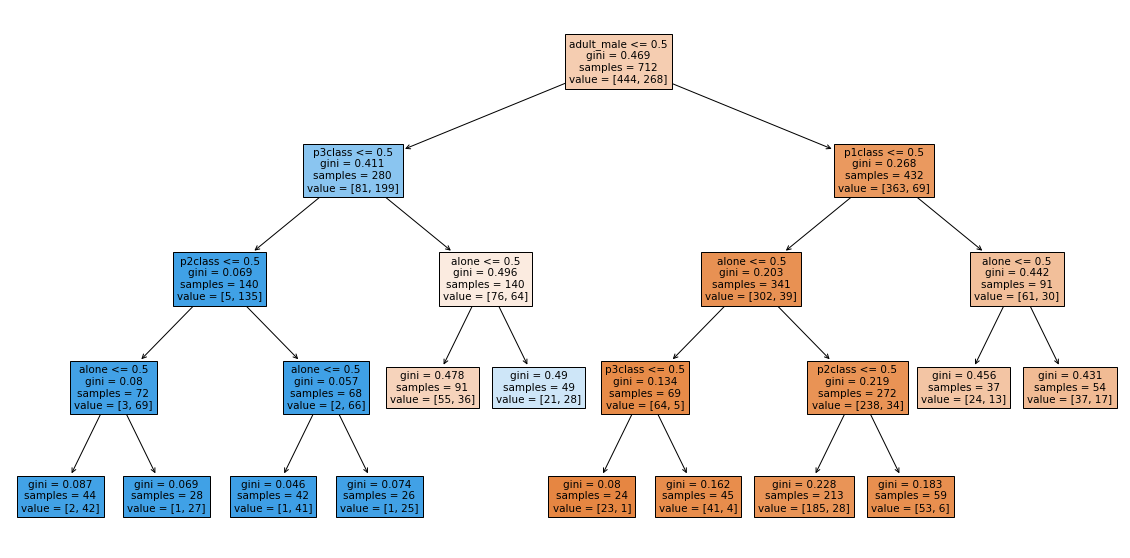

In [92]:
# 트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['p1class', 'p2class', 'p3class', 'alone', 'adult_male'])
plt.show()

In [88]:
print(dt.feature_names_in_)
print(dt.feature_importances_)

['p1class' 'p2class' 'p3class' 'alone' 'adult_male']
[4.48975975e-02 6.22594915e-04 2.43231317e-01 1.57885049e-02
 6.95459986e-01]


In [89]:
# adult_male > p3class > p1class > alone > p2class
# survived = 0: 비생존, 1: 생존

pred_A = [[True, False, False, True, False]]
print(dt.predict(pred_A))
print(dt.predict_proba(pred_A))

[1]
[[0.03571429 0.96428571]]


c:\Users\CDL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\CDL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [90]:
pred_B = [[False, False, True, False, True]]
print(dt.predict(pred_B))
print(dt.predict_proba(pred_B))

[0]
[[0.91111111 0.08888889]]


c:\Users\CDL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\CDL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [84]:
# df[['survived', 'alive']]
# df[['survived', 'sex', 'adult_male', 'age']]
df.loc[[df['age'] > 18] and df['sex'] == 'female']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_num,p1class,p2class,p3class
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,True,False,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,1.0,False,False,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,1.0,False,True,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True,1.0,False,False,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,1.0,False,False,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1.0,True,False,False


In [95]:
# 교차검증 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# 결정트리 모델
dt = DecisionTreeClassifier(random_state=42)

# 데이터set 나누기
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=42)

# 교차검증
scores = cross_validate(dt, X_train, y_train)
scores

{'fit_time': array([0.00105023, 0.        , 0.        , 0.        , 0.00746918]),
 'score_time': array([0.        , 0.        , 0.01545501, 0.        , 0.        ]),
 'test_score': array([0.82517483, 0.83216783, 0.81690141, 0.76056338, 0.84507042])}

In [97]:
# 교차검증 최종점수
np.mean(scores['test_score'])

0.8159755737220525

In [101]:
# 테스트set 점수
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8160112359550562
0.8100558659217877


In [102]:
# k-Fold (default)
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, X_train, y_train, cv=StratifiedKFold())
scores
np.mean(scores['test_score'])

0.8159755737220525

In [105]:
# k-Fold (dn_splits=)
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(dt, X_train, y_train, cv=splitter)
# print(scores)
np.mean(scores['test_score'])

0.8161384976525822

In [111]:
# GridSearchCV 하이퍼파라미터 조정
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [3, 5, 8, 10] , 'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs = GridSearchCV(dt, params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [112]:
gs.best_params_

{'max_depth': 3, 'min_impurity_decrease': 0.0001}

In [113]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.0001,
                       random_state=42)

In [114]:
dt_best = gs.best_estimator_
dt_best.score(X_train, y_train)

0.8160112359550562

In [117]:
# 각 매개변수에서 수행한 교차 검증의 평균 점수 확인
gs.cv_results_['mean_test_score']

array([0.81597557, 0.81597557, 0.81597557, 0.81597557, 0.81597557,
       0.81597557, 0.81597557, 0.81597557, 0.81597557, 0.81597557,
       0.81597557, 0.81597557, 0.81597557, 0.81597557, 0.81597557,
       0.81597557, 0.81597557, 0.81597557, 0.81597557, 0.81597557])

In [118]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
gs.cv_results_['params'][best_index]

{'max_depth': 3, 'min_impurity_decrease': 0.0001}

In [119]:
# 좀 더 복잡한 매개변수 조합 탐색
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

gs = GridSearchCV(dt, params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [120]:
gs.best_params_

{'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}

In [121]:
np.max(gs.cv_results_['mean_test_score'])

0.8159755737220525

In [122]:
# 랜덤서치 (RandomizedSearchCV)
# uniform() = 실수값, randint() = 정수값

from scipy.stats import uniform, randint
rgen = randint(0, 10)  # 정수 0 ~ 9까지의 난수 범위 생성
rgen.rvs(10)  # rvs 메서드를 사용하여 10개의 난수 생성

array([2, 8, 3, 3, 9, 2, 1, 1, 9, 7])

In [123]:
np.unique(rgen.rvs(1000), return_counts=True)  # return_counts=True 각 고유 값의 발생 횟수 반환

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([122,  84,  83, 104, 104, 107, 115,  98,  94,  89], dtype=int64))

In [127]:
# 0 ~ 1 사이의 10개 실수를 추출
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.30003072, 0.98818955, 0.80234148, 0.46969348, 0.89535655,
       0.62640964, 0.56095045, 0.55645469, 0.38005225, 0.84686979])

In [128]:
from sklearn.model_selection import RandomizedSearchCV

params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(20, 50),
          'min_samples_split' : randint(2, 25),
          'min_samples_leaf' : randint(1, 25)
          }

gs = RandomizedSearchCV(dt, params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FABC7867C0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FABC744190>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FABC786A00>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FABC1A4820>},
                   random_state=42)

In [129]:
gs.best_params_

{'max_depth': 26,
 'min_impurity_decrease': 0.0008965429868602329,
 'min_samples_leaf': 15,
 'min_samples_split': 12}

In [130]:
np.max(gs.cv_results_['mean_test_score'])

0.8159755737220525

In [131]:
dt_best_random = gs.best_estimator_
dt_best_random.score(X_test, y_test)

0.8100558659217877